# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
# create base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# counters
city_counter = 0
set_counter = 1

# create the lists to hold requested data
cities_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Beginning Data Retrieval")
print('-------------------------')

# Create a query url for each city in the cities list to get json response
for city in cities:
    query_url = base_url + "&q=" + city
    # pull weather data
    response = requests.get(query_url).json()
    if city_counter < 50:
        city_counter += 1
    else:
        set_counter += 1
        city_counter = 1

    # print  results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")

   # add values to the empty lists
    try:       
        cities_list.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
    except:
        print("City not found. Skipping...")
        pass
        
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | russell
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | killybegs
Processing Record 9 of Set 1 | inongo
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | grindavik
Processing Record 12 of Set 1 | vao
Processing Record 13 of Set 1 | sorong
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | yumen
Processing Record 17 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | saurimo
Processing Record 20 of Set 1 | hambantota
Processing Record 21 of Set 1 | cabo san lucas
Processing Record 22 of Set 1 | esperance
Processing Record 23 o

Processing Record 38 of Set 4 | bayan
Processing Record 39 of Set 4 | tikamgarh
Processing Record 40 of Set 4 | pochutla
Processing Record 41 of Set 4 | beloha
Processing Record 42 of Set 4 | bandarbeyla
Processing Record 43 of Set 4 | chilca
Processing Record 44 of Set 4 | jamestown
Processing Record 45 of Set 4 | labuhan
Processing Record 46 of Set 4 | new norfolk
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | kahului
Processing Record 49 of Set 4 | sistranda
Processing Record 50 of Set 4 | ponta do sol
Processing Record 1 of Set 5 | mutsamudu
City not found. Skipping...
Processing Record 2 of Set 5 | pangnirtung
Processing Record 3 of Set 5 | sungaipenuh
Processing Record 4 of Set 5 | abu dhabi
Processing Record 5 of Set 5 | urumqi
Processing Record 6 of Set 5 | mersing
Processing Record 7 of Set 5 | pimentel
Processing Record 8 of Set 5 | madang
Processing Record 9 of Set 5 | havre-saint-pierre
Processing Record 10 of Set 5 | kruisfontein
Processing Reco

Processing Record 26 of Set 8 | ahipara
Processing Record 27 of Set 8 | tuatapere
Processing Record 28 of Set 8 | beni
Processing Record 29 of Set 8 | bubaque
Processing Record 30 of Set 8 | anloga
Processing Record 31 of Set 8 | talnakh
Processing Record 32 of Set 8 | pierre
Processing Record 33 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 34 of Set 8 | hualmay
Processing Record 35 of Set 8 | nuristan
Processing Record 36 of Set 8 | viligili
City not found. Skipping...
Processing Record 37 of Set 8 | ushibuka
Processing Record 38 of Set 8 | indramayu
Processing Record 39 of Set 8 | gondal
Processing Record 40 of Set 8 | begamganj
Processing Record 41 of Set 8 | mehamn
Processing Record 42 of Set 8 | sembakung
Processing Record 43 of Set 8 | ca mau
Processing Record 44 of Set 8 | sambava
Processing Record 45 of Set 8 | camacha
Processing Record 46 of Set 8 | nyurba
Processing Record 47 of Set 8 | tubruq
City not found. Skipping...
Processing Record 48

Processing Record 14 of Set 12 | campbellton
Processing Record 15 of Set 12 | caapucu
Processing Record 16 of Set 12 | mansa
Processing Record 17 of Set 12 | nushki
Processing Record 18 of Set 12 | ziro
Processing Record 19 of Set 12 | namwala
Processing Record 20 of Set 12 | zabol
Processing Record 21 of Set 12 | yulara
Processing Record 22 of Set 12 | poso
Processing Record 23 of Set 12 | de-kastri
Processing Record 24 of Set 12 | tarabuco
Processing Record 25 of Set 12 | kitimat
Processing Record 26 of Set 12 | grand gaube
Processing Record 27 of Set 12 | lodja
Processing Record 28 of Set 12 | presidencia roque saenz pena
Processing Record 29 of Set 12 | bathsheba
Processing Record 30 of Set 12 | tual
Processing Record 31 of Set 12 | san patricio
Processing Record 32 of Set 12 | betul
Processing Record 33 of Set 12 | baracoa
Processing Record 34 of Set 12 | el carmen
Processing Record 35 of Set 12 | sterling
Processing Record 36 of Set 12 | egvekinot
Processing Record 37 of Set 12 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# create a data frame from cities, temp, humidity, cloudiness and wind speed
weather_data = {
    "City": cities_list,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Max Temp": max_temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind_speed
}
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Max Temp      548
Lat           548
Lng           548
Wind Speed    548
dtype: int64

In [28]:
# show dataframe  
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Max Temp,Lat,Lng,Wind Speed
0,Port Elizabeth,20,ZA,1580008361,88,68.0,-33.92,25.57,23.04
1,Albany,90,US,1580008326,100,39.2,42.60,-73.97,3.36
2,Russell,1,US,1580008193,80,46.4,32.35,-85.20,3.36
3,Tuktoyaktuk,90,CA,1580008362,75,-13.0,69.45,-133.04,25.28
4,Bredasdorp,68,ZA,1580008363,87,59.0,-34.53,20.04,13.87


In [29]:
# export to a csv file
weather_df.to_csv("output_data/cities.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

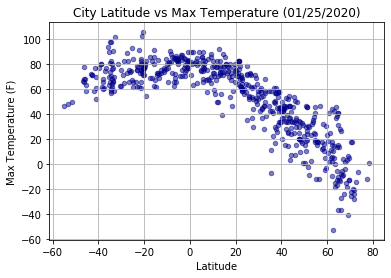

In [30]:
# date dependency call
from datetime import date
# scatter plot creation
weather_df.plot(kind='scatter', x='Lat', y='Max Temp', c='DarkBlue', alpha=0.5)

# set date variable to show today's date and create titles and labels
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs Max Temperature ({d1})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("images/Lat_Temp.png")
plt.show()

### Observation:

Not suprisingly, the closer to the equator (0 degree lat) the higher the max tempatures are.

#### Latitude vs. Humidity Plot

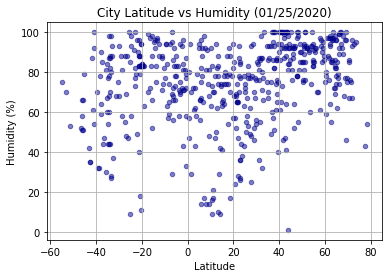

In [31]:
# scatter plot creation
weather_df.plot(kind='scatter', x='Lat', y='Humidity', c='DarkBlue', alpha=0.5)

# set date variable to show today's date and create titles and labels
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs Humidity ({d1})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("images/Lat_Humidity.png")
plt.show()

### Observation:

There seems to be little relationship between latitude and humidity.

#### Latitude vs. Cloudiness Plot

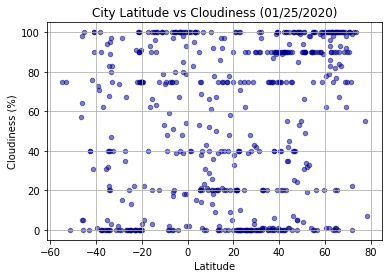

In [32]:
# scatter plot creation
weather_df.plot(kind='scatter', x='Lat', y='Cloudiness', c='DarkBlue', alpha=0.5)

# set date variable to show today's date and create titles and labels
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs Cloudiness ({d1})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("images/Lat_Clouds.png")
plt.show()

### Observation:
There seems to be little relationship between latitude and cloudiness.

#### Latitude vs. Wind Speed Plot

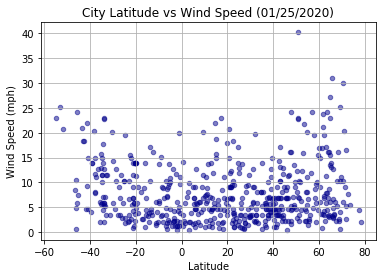

In [33]:
# scatter plot creation
weather_df.plot(kind='scatter', x='Lat', y='Wind Speed', c='DarkBlue', alpha=0.5)

# set date variable to show today's date and create titles and labels
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs Wind Speed ({d1})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("images/Lat_Wind.png")
plt.show()


### Observation:
There seems to be little relationship between latitude and cloudiness.

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression